# Import Libraries

In [ ]:
#Import libraries
import pytz
import numpy as np
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
import os
import random

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    tf.config.experimental.enable_op_determinism()

set_seed(42)

# Load Data and Plot Data

In [ ]:
print("="*100)
print("LOADING DATASETS")
print("="*100)

df_BBRI = pd.read_csv('BBRI.JK_OHLC_Data_Technical.csv')
df_BBRI_Full = pd.read_csv('BBRI_merged_stock_and_sentiment_Full.csv')

print("\nBBRI Dataset Preview:")
print(df_BBRI.head())
print("\nBBRI + Sentiment Dataset Preview:")
print(df_BBRI_Full.head())

LOADING DATASETS

BBRI Dataset Preview:
                    Datetime   Close    High     Low    Open    Volume  \
0  2023-10-09 09:00:00+07:00  5200.0  5225.0  5175.0  5200.0  15199300   
1  2023-10-09 10:00:00+07:00  5175.0  5200.0  5125.0  5200.0  33701800   
2  2023-10-09 11:00:00+07:00  5150.0  5175.0  5150.0  5150.0   7039400   
3  2023-10-09 13:00:00+07:00  5175.0  5175.0  5150.0  5175.0   7545900   
4  2023-10-09 14:00:00+07:00  5125.0  5175.0  5125.0  5175.0  29913600   

   EMA_12  EMA_26    RSI_14  
0     NaN     NaN       NaN  
1     NaN     NaN  0.000000  
2     NaN     NaN  0.000000  
3     NaN     NaN  7.142857  
4     NaN     NaN  6.190476  

BBRI + Sentiment Dataset Preview:
                    Datetime   Close    High     Low    Open    Volume  \
0  2023-10-09 09:00:00+07:00  5200.0  5225.0  5175.0  5200.0  15199300   
1  2023-10-09 10:00:00+07:00  5175.0  5200.0  5125.0  5200.0  33701800   
2  2023-10-09 11:00:00+07:00  5150.0  5175.0  5150.0  5150.0   7039400   
3  2

In [ ]:
df_BBRI['Datetime'] = pd.to_datetime(df_BBRI['Datetime'])
df_BBRI_Full['Datetime'] = pd.to_datetime(df_BBRI_Full['Datetime'])


DATA VISUALIZATION


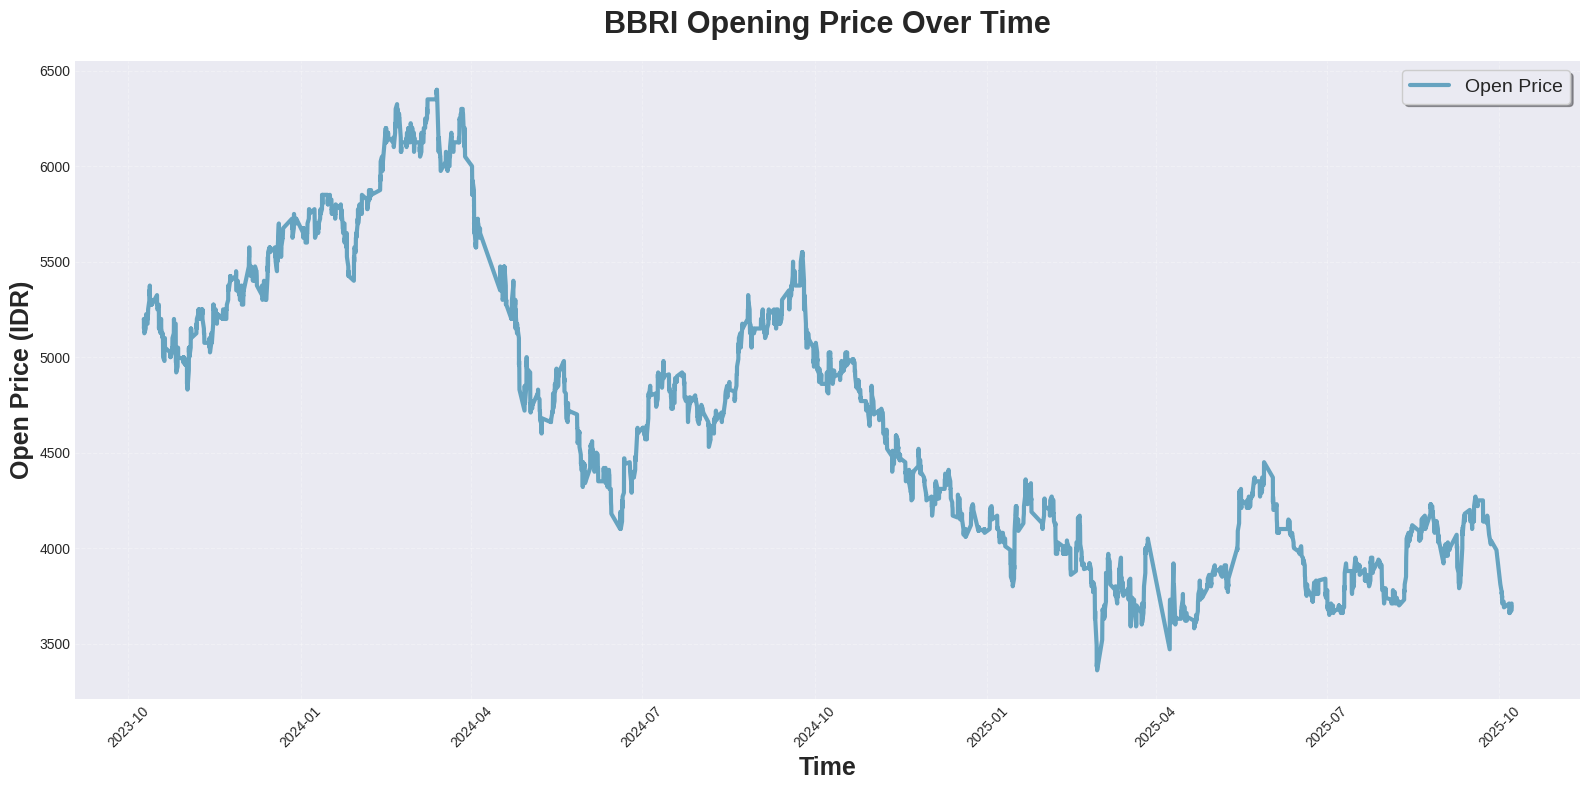

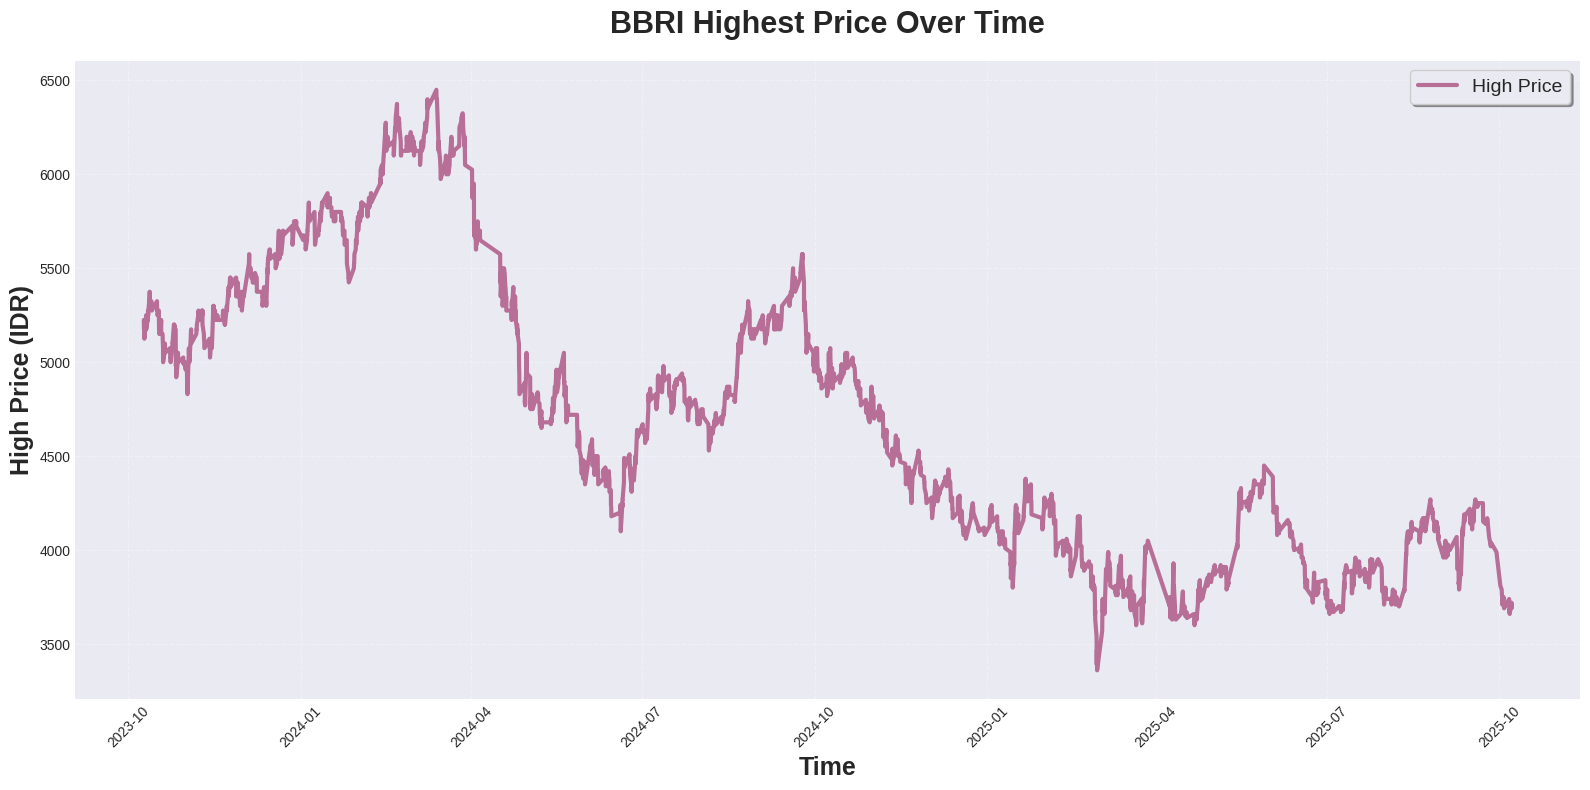

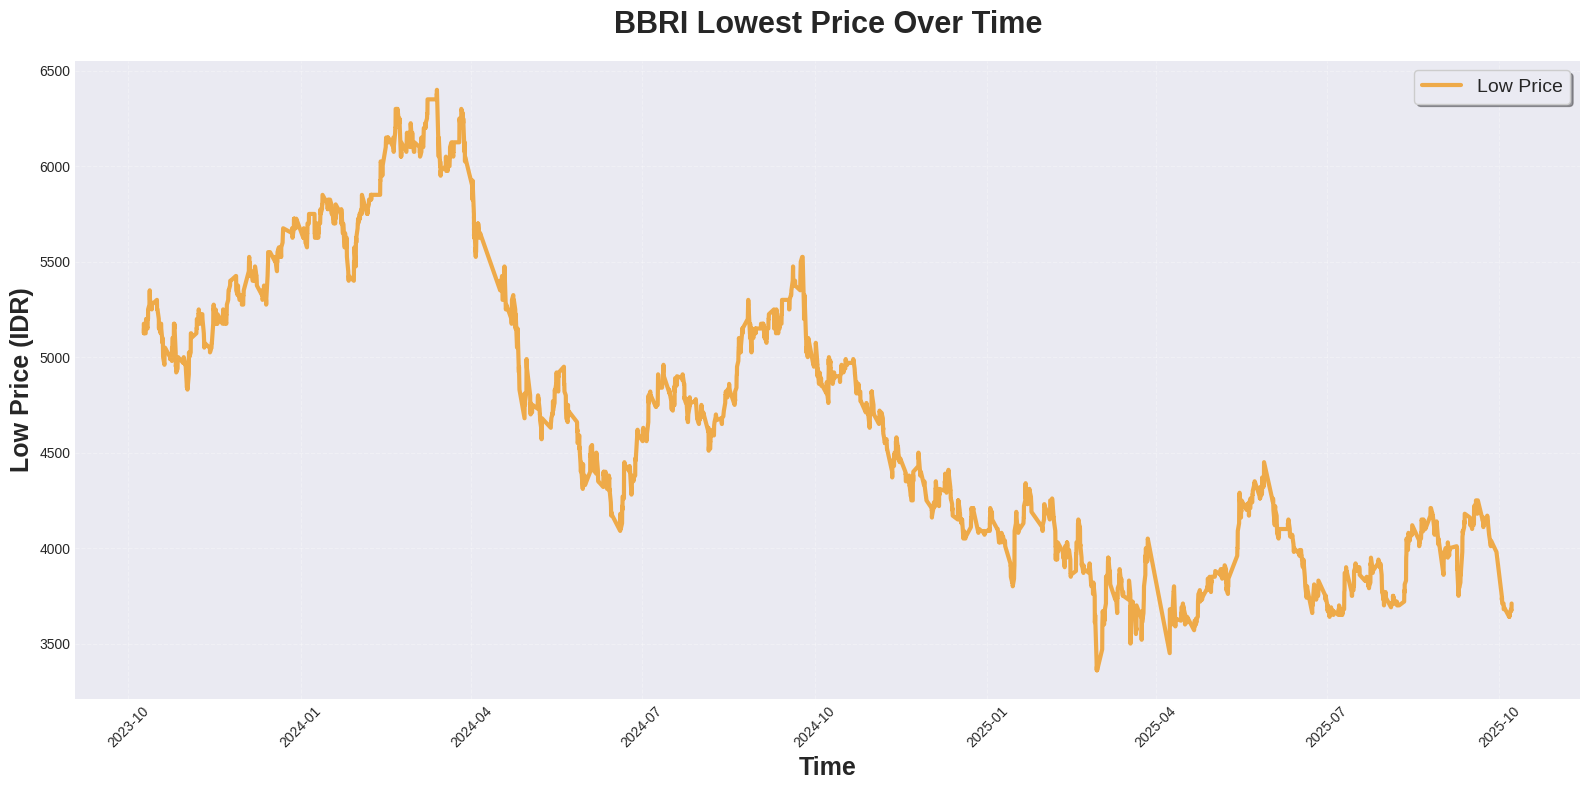

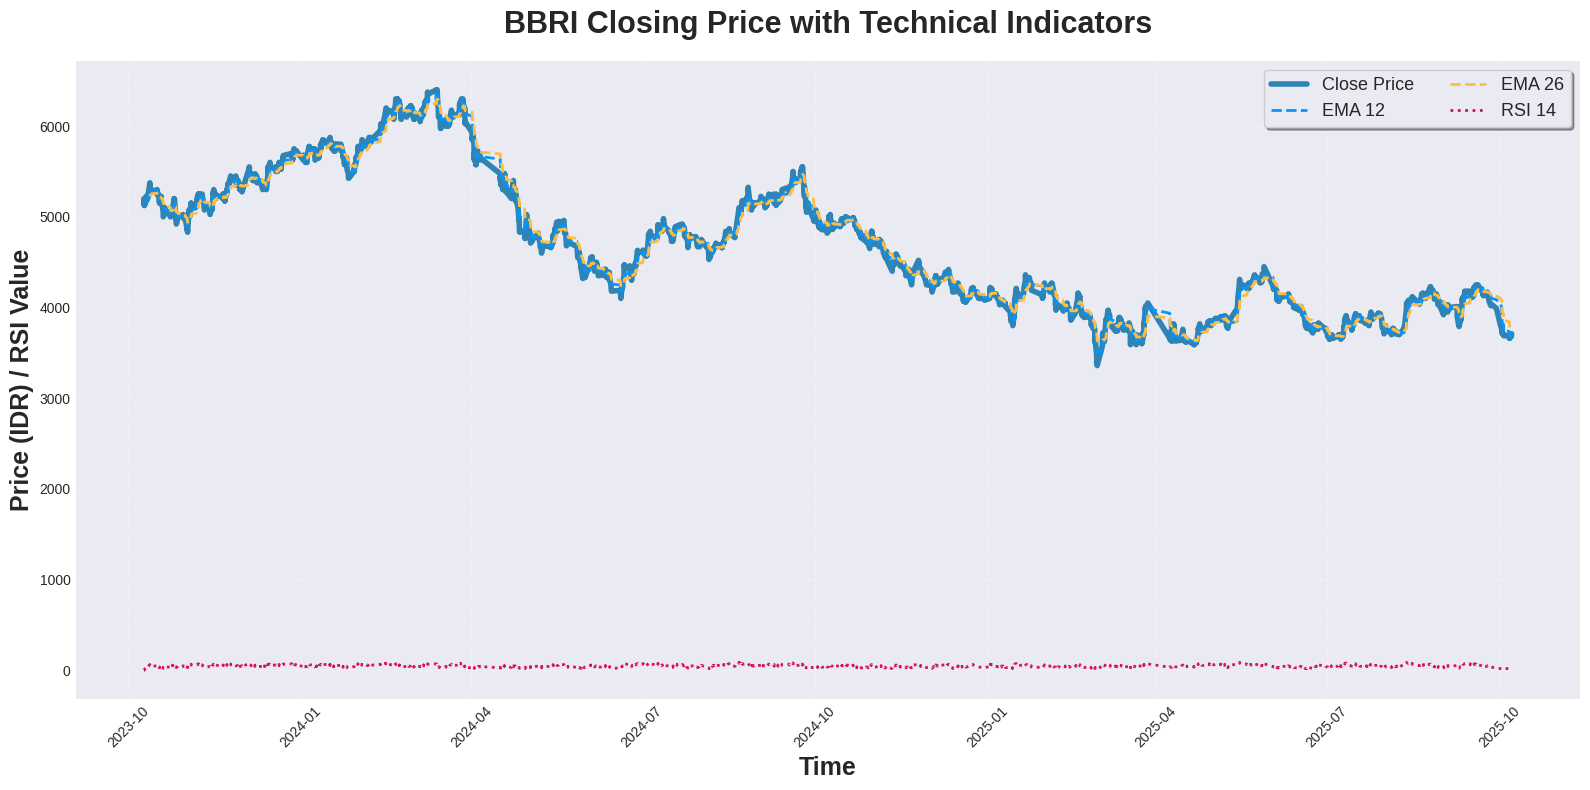

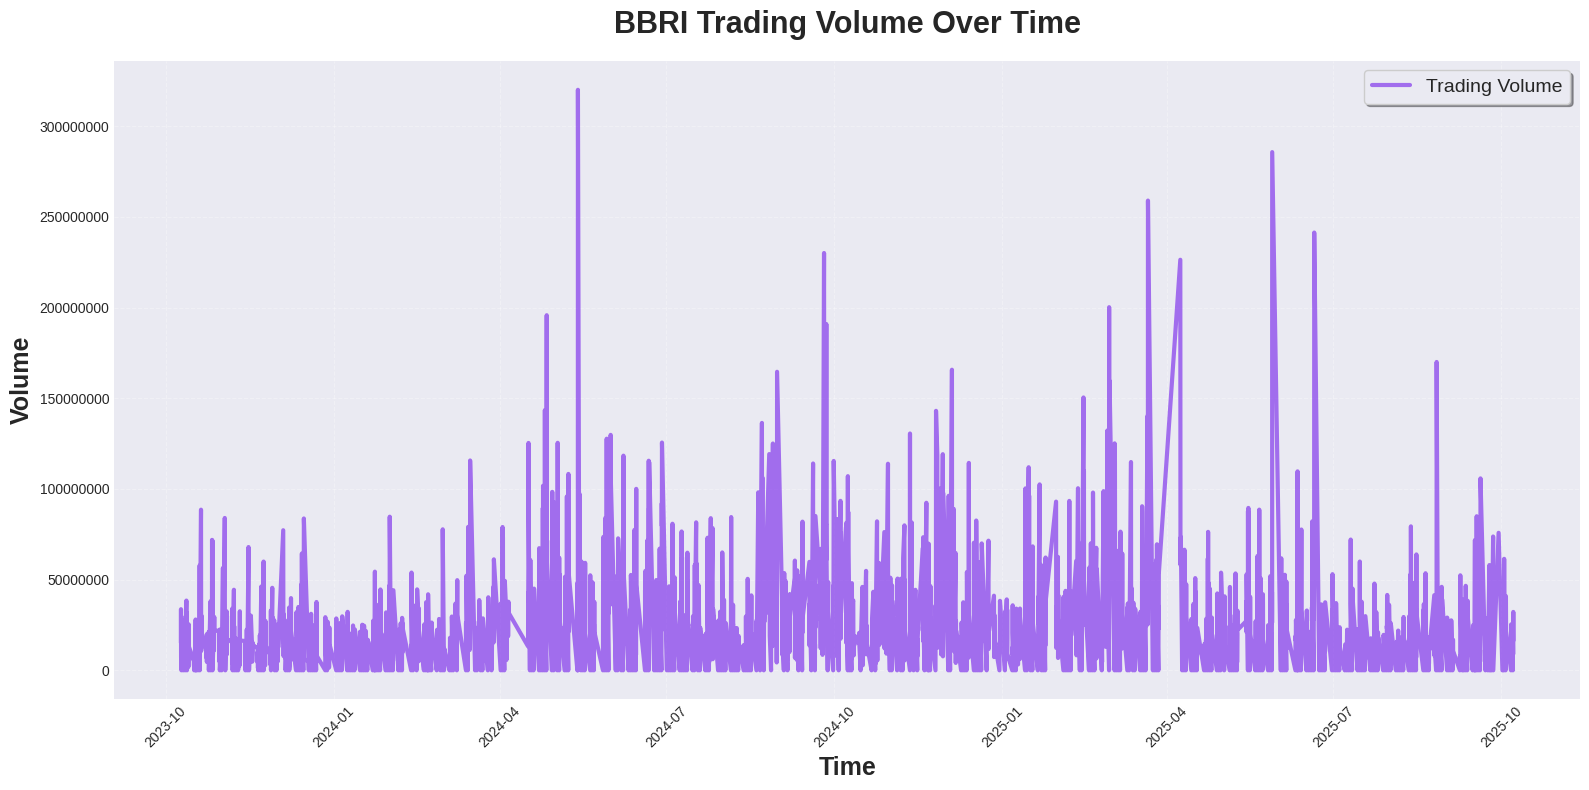

/tmp/ipython-input-2621172810.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment_value', data=df_BBRI_Full , palette=custom_palette, edgecolor='black', alpha=0.85)


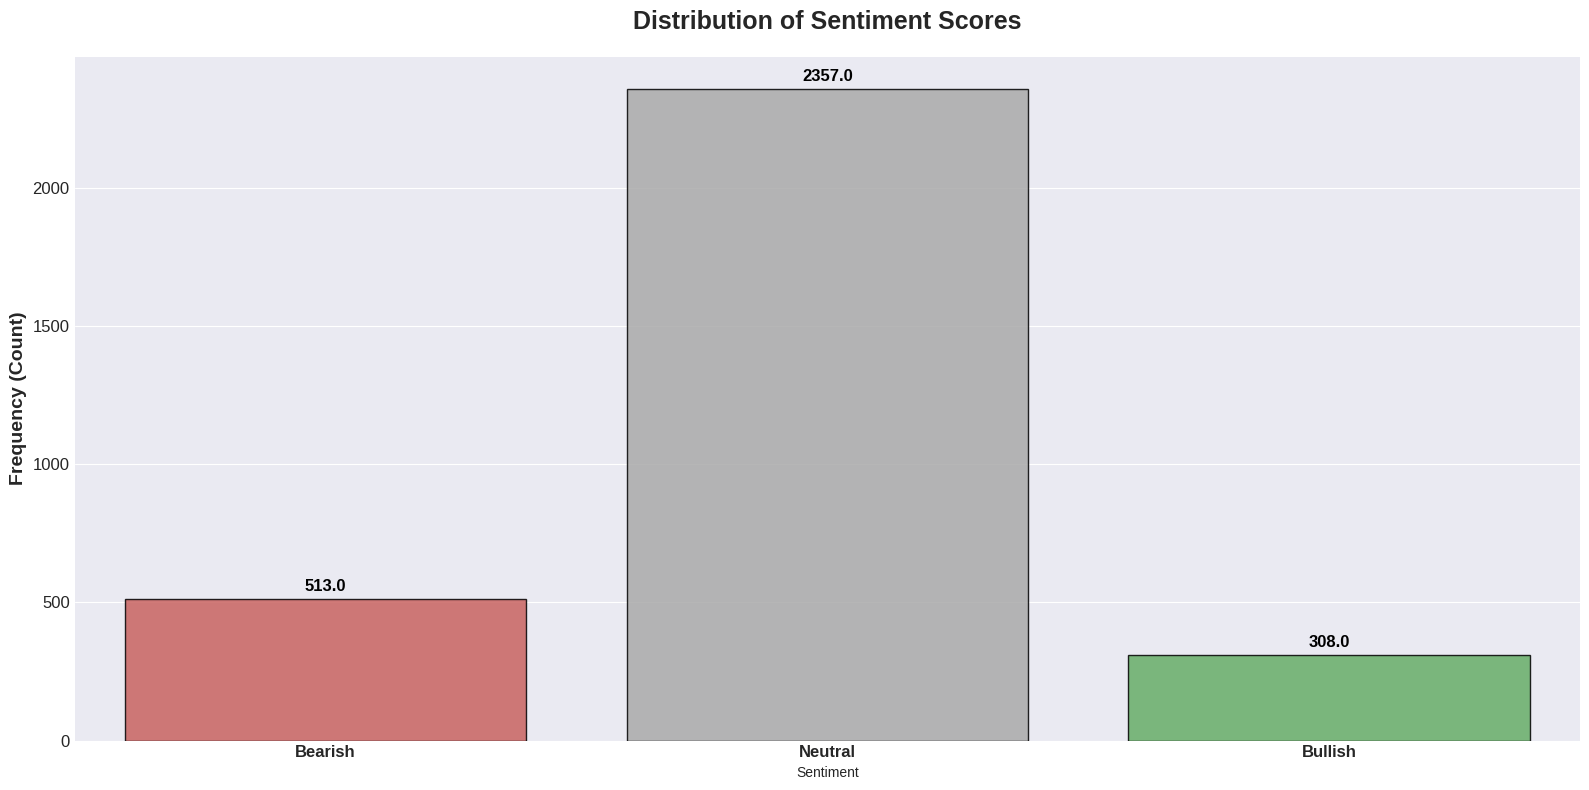

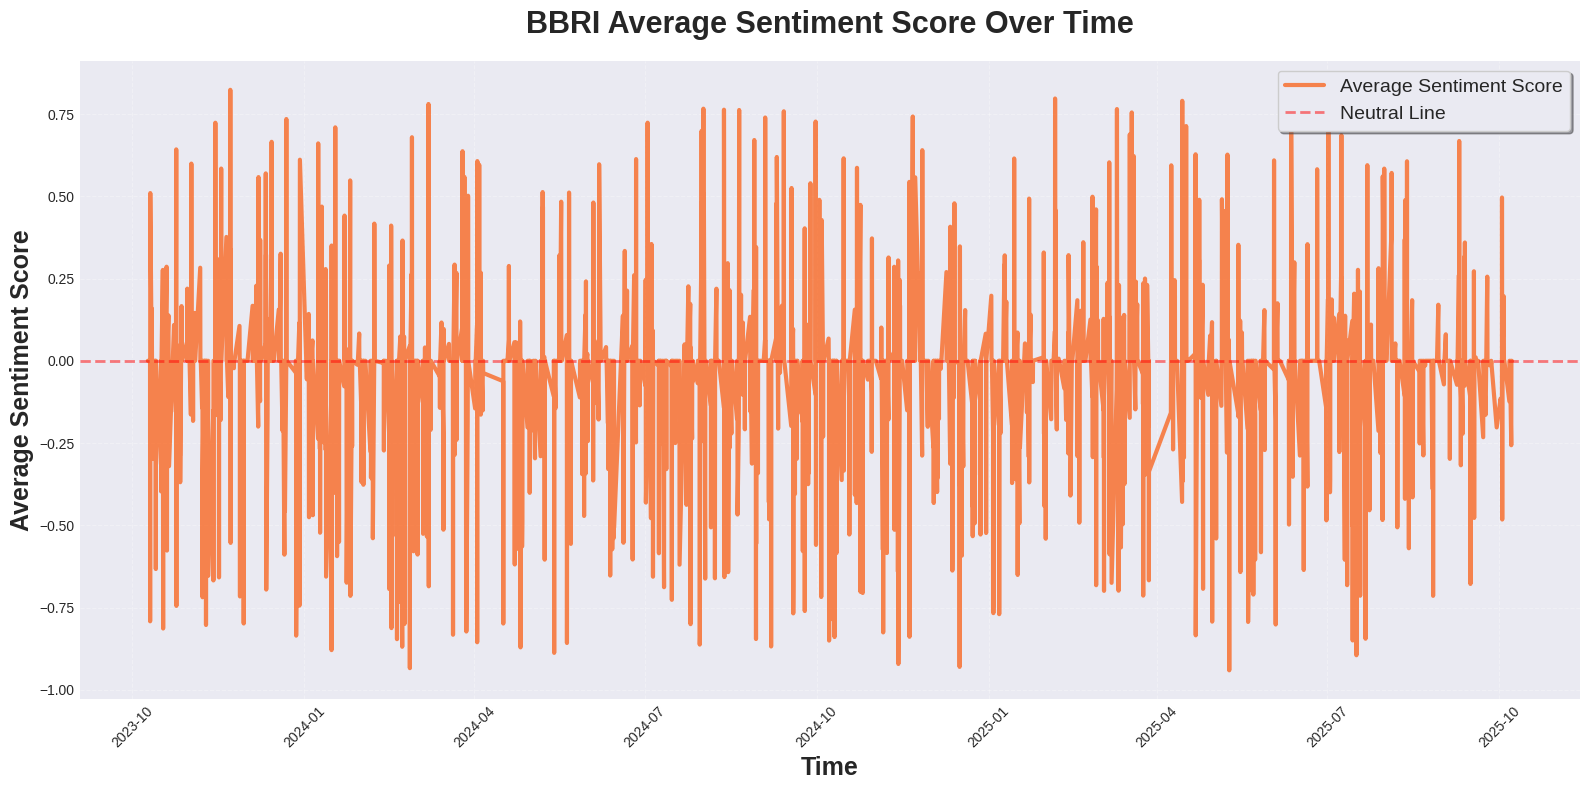

In [ ]:
print("\n" + "="*100)
print("DATA VISUALIZATION")
print("="*100)

# Plot Open Price
plt.figure(figsize=(16,8))
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['Open'], alpha=0.7, linewidth=3, color='#2E86AB', label='Open Price')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Open Price (IDR)', fontsize=18, fontweight='bold')
plt.title('BBRI Opening Price Over Time', fontsize=22, fontweight='bold', pad=20)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n'+'='*100)

# Plot High Price
plt.figure(figsize=(16,8))
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['High'], alpha=0.7, linewidth=3, color='#A23B72', label='High Price')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('High Price (IDR)', fontsize=18, fontweight='bold')
plt.title('BBRI Highest Price Over Time', fontsize=22, fontweight='bold', pad=20)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n'+'='*100)

# Plot Low Price
plt.figure(figsize=(16,8))
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['Low'], alpha=0.7, linewidth=3, color='#F18F01', label='Low Price')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Low Price (IDR)', fontsize=18, fontweight='bold')
plt.title('BBRI Lowest Price Over Time', fontsize=22, fontweight='bold', pad=20)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n'+'='*100)

# Plot Close Price with EMA and RSI
plt.figure(figsize=(16,8))
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['Close'], alpha=0.8, linewidth=4, color='#006BA6', label='Close Price')
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['EMA_12'], linewidth=2, color='#0496FF', label='EMA 12', linestyle='--')
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['EMA_26'], linewidth=2, color='#FFBC42', label='EMA 26', linestyle='--')
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['RSI_14'], linewidth=2, color='#D81159', label='RSI 14', linestyle=':')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Price (IDR) / RSI Value', fontsize=18, fontweight='bold')
plt.title('BBRI Closing Price with Technical Indicators', fontsize=22, fontweight='bold', pad=20)
plt.legend(fontsize=13, loc='best', frameon=True, shadow=True, ncol=2)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n'+'='*100)

# Plot Volume
plt.figure(figsize=(16,8))
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['Volume'], alpha=0.7, linewidth=3, color='#8338EC', label='Trading Volume')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Volume', fontsize=18, fontweight='bold')
plt.title('BBRI Trading Volume Over Time', fontsize=22, fontweight='bold', pad=20)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
print('\n'+'='*100)

# Plot Sentiment Distribution
plt.figure(figsize=(16,8))
custom_palette = {'-1': '#D9534F', '0': '#AAAAAA', '1': '#5CB85C'}
ax = sns.countplot(x='Sentiment_value', data=df_BBRI_Full , palette=custom_palette, edgecolor='black', alpha=0.85)
plt.xlabel('Sentiment')
plt.ylabel('Frequency (Count)', fontsize=14, fontweight='bold')
plt.title('Distribution of Sentiment Scores', fontsize=18, fontweight='bold', pad=20)
plt.xticks(ticks=['-1', '0', '1'], labels=['Bearish', 'Neutral', 'Bullish'],fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold',xytext=(0, 9), textcoords='offset points')
sns.despine()
plt.tight_layout()
plt.show()
print('\n'+'='*100)

# Plot Average Sentiment Score
plt.figure(figsize=(16,8))
sns.lineplot(x=df_BBRI_Full['Datetime'], y=df_BBRI_Full['average_score'], alpha=0.7, linewidth=3, color='#FB5607', label='Average Sentiment Score')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Average Sentiment Score', fontsize=18, fontweight='bold')
plt.title('BBRI Average Sentiment Score Over Time', fontsize=22, fontweight='bold', pad=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Neutral Line')
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n'+'='*100)

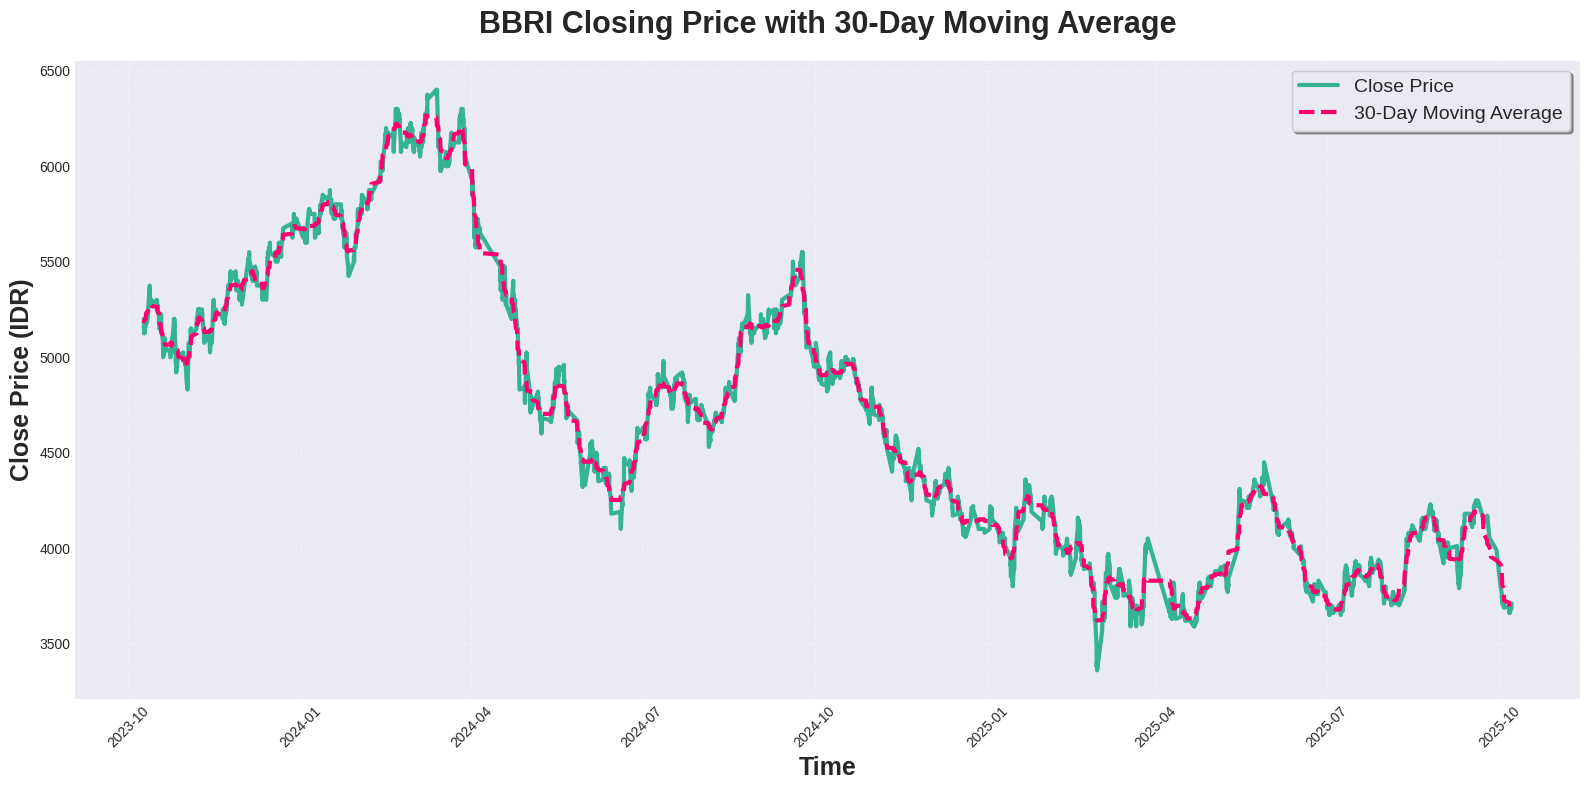

In [ ]:
# Plot Close Price with Moving Average
plt.figure(figsize=(16,8))
ma_30 = df_BBRI['Close'].rolling(window=30, center=True, min_periods=15).mean()
sns.lineplot(x=df_BBRI['Datetime'], y=df_BBRI['Close'], alpha=0.8, linewidth=3, color='#06A77D', label='Close Price')
sns.lineplot(x=df_BBRI['Datetime'], y=ma_30, linewidth=3, color='#FF006E', label='30-Day Moving Average', linestyle='--')
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Close Price (IDR)', fontsize=18, fontweight='bold')
plt.title('BBRI Closing Price with 30-Day Moving Average', fontsize=22, fontweight='bold', pad=20)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n'+'='*100)

In [ ]:
# Data Preprocessing
print("="*100)
print("DATA PREPROCESSING")
print("="*100)

df_BBRI.set_index('Datetime', inplace=True)
df_BBRI['EMA_12'] = df_BBRI['EMA_12'].interpolate(method='linear', limit_direction='both')
df_BBRI['EMA_26'] = df_BBRI['EMA_26'].interpolate(method='linear', limit_direction='both')
df_BBRI['RSI_14'] = df_BBRI['RSI_14'].interpolate(method='linear', limit_direction='both')

df_BBRI_Full.set_index('Datetime', inplace=True)
df_BBRI_Full['EMA_12'] = df_BBRI_Full['EMA_12'].interpolate(method='linear', limit_direction='both')
df_BBRI_Full['EMA_26'] = df_BBRI_Full['EMA_26'].interpolate(method='linear', limit_direction='both')
df_BBRI_Full['RSI_14'] = df_BBRI_Full['RSI_14'].interpolate(method='linear', limit_direction='both')

print("\nBBRI Dataset Info:")
print(df_BBRI.info())
print("\nBBRI + Sentiment Dataset Info:")
print(df_BBRI_Full.info())

DATA PREPROCESSING

BBRI Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3178 entries, 2023-10-09 09:00:00+07:00 to 2025-10-07 16:00:00+07:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3178 non-null   float64
 1   High    3178 non-null   float64
 2   Low     3178 non-null   float64
 3   Open    3178 non-null   float64
 4   Volume  3178 non-null   int64  
 5   EMA_12  3178 non-null   float64
 6   EMA_26  3178 non-null   float64
 7   RSI_14  3178 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 223.5 KB
None

BBRI + Sentiment Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3178 entries, 2023-10-09 09:00:00+07:00 to 2025-10-07 16:00:00+07:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              3178 non-null   float64
 1   High               3178 non-null   float64
 

In [ ]:
features_BBRI = df_BBRI[['Close','High','Low','Open','Volume','EMA_12','EMA_26','RSI_14']].values
features_BBRI_Full = df_BBRI_Full[['Close','High','Low','Open','Volume','EMA_12','EMA_26','RSI_14','average_score']].values

print(f"\nBBRI Features Shape: {features_BBRI.shape}")
print(f"BBRI + Sentiment Features Shape: {features_BBRI_Full.shape}")


BBRI Features Shape: (3178, 8)
BBRI + Sentiment Features Shape: (3178, 9)


In [ ]:
target_col = 'Close'

target_col_BBRI = list(df_BBRI.columns).index(target_col)
target_col_BBRI_Full = list(df_BBRI_Full.columns).index(target_col)

print(f"\nTarget Column Index (BBRI): {target_col_BBRI}")
print(f"Target Column Index (BBRI + Sentiment): {target_col_BBRI_Full}")


Target Column Index (BBRI): 0
Target Column Index (BBRI + Sentiment): 0


# Splitting Data Train and Test

In [ ]:
# Train-Test Split
print("\n" + "="*100)
print("TRAIN-TEST SPLIT")
print("="*100)
train_size_BBRI = int(len(features_BBRI) * 0.8)
train_data_BBRI = features_BBRI[:train_size_BBRI]
test_data_BBRI = features_BBRI[train_size_BBRI:]

train_size_BBRI_Full = int(len(features_BBRI_Full) * 0.8)
train_data_BBRI_Full = features_BBRI_Full[:train_size_BBRI_Full]
test_data_BBRI_Full = features_BBRI_Full[train_size_BBRI_Full:]

print(f"BBRI Train Size: {train_size_BBRI} | Test Size: {len(test_data_BBRI)}")
print(f"BBRI + Sentiment Train Size: {train_size_BBRI_Full} | Test Size: {len(test_data_BBRI_Full)}")


TRAIN-TEST SPLIT
BBRI Train Size: 2542 | Test Size: 636
BBRI + Sentiment Train Size: 2542 | Test Size: 636


In [ ]:
scaler_BBRI = MinMaxScaler(feature_range=(0, 1))
scaled_train_data_BBRI = scaler_BBRI.fit_transform(train_data_BBRI)

scaler_BBRI_Full = MinMaxScaler(feature_range=(0, 1))
scaled_train_data_BBRI_Full = scaler_BBRI_Full.fit_transform(train_data_BBRI_Full)

scaled_test_data_BBRI = scaler_BBRI.transform(test_data_BBRI)
scaled_test_data_BBRI_Full = scaler_BBRI_Full.transform(test_data_BBRI_Full)
print("\nData scaling completed successfully")


Data scaling completed successfully


# Create Sliding Window

In [ ]:
print("\n" + "="*100)
print("CREATING SLIDING WINDOWS")
print("="*100)
def create_sliding_window(dataset, target_index, window_size):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        # Input: all features from i-window_size to i
        X.append(dataset[i-window_size:i, :])
        # Output: only target column at time i
        y.append(dataset[i, target_index])
    return np.array(X), np.array(y)

window_size_B = 48
X_train_BBRI, y_train_BBRI = create_sliding_window(scaled_train_data_BBRI, target_col_BBRI, window_size_B)
X_test_BBRI, y_test_BBRI = create_sliding_window(scaled_test_data_BBRI, target_col_BBRI, window_size_B)

window_size_Full = 48
X_train_BBRI_Full, y_train_BBRI_Full = create_sliding_window(scaled_train_data_BBRI_Full, target_col_BBRI_Full, window_size_Full)
X_test_BBRI_Full, y_test_BBRI_Full = create_sliding_window(scaled_test_data_BBRI_Full, target_col_BBRI_Full, window_size_Full)

print(f"X_train BBRI Shape: {X_train_BBRI.shape}")
print(f"y_train BBRI Shape: {y_train_BBRI.shape}")
print(f"X_test BBRI Shape: {X_test_BBRI.shape}")
print(f"y_test BBRI Shape: {y_test_BBRI.shape}")

print(f"\nX_train BBRI + Sentiment Shape: {X_train_BBRI_Full.shape}")
print(f"y_train BBRI + Sentiment Shape: {y_train_BBRI_Full.shape}")
print(f"X_test BBRI + Sentiment Shape: {X_test_BBRI_Full.shape}")
print(f"y_test BBRI + Sentiment Shape: {y_test_BBRI_Full.shape}")


CREATING SLIDING WINDOWS
X_train BBRI Shape: (2494, 48, 8)
y_train BBRI Shape: (2494,)
X_test BBRI Shape: (588, 48, 8)
y_test BBRI Shape: (588,)

X_train BBRI + Sentiment Shape: (2494, 48, 9)
y_train BBRI + Sentiment Shape: (2494,)
X_test BBRI + Sentiment Shape: (588, 48, 9)
y_test BBRI + Sentiment Shape: (588,)


# Building LSTM Model

In [ ]:
print("\n" + "="*100)
print("BUILDING LSTM MODELS")
print("="*100)
def build_lstm_model(input_shape, units_1, dropout_rate, lr):
    """Build LSTM model"""
    set_seed(42)
    model = Sequential([
        LSTM(units=units_1, return_sequences=False, recurrent_activation='sigmoid', activation='tanh', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(1)
    ], name='LSTM_Model')

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=lr),
                  metrics=['mae', keras.metrics.RootMeanSquaredError()])
    return model

def create_callbacks():
    """Create callbacks untuk training"""
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
    return [early_stop, reduce_lr]


BUILDING LSTM MODELS


In [ ]:
# BBRI Model
input_shape_BBRI = (X_train_BBRI.shape[1], X_train_BBRI.shape[2])
units_1_BBRI = 128
dropout_BBRI = 0.1
lr_BBRI = 0.001
model_BBRI = build_lstm_model(input_shape_BBRI, units_1_BBRI, dropout_BBRI, lr_BBRI)
print("\n--- BBRI Model Created ---")
model_BBRI.summary()


--- BBRI Model Created ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,273 (274.50 KB)

 Trainable params: 70,273 (274.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# BBRI + Sentiment Model
input_shape_BBRI_Full = (X_train_BBRI_Full.shape[1], X_train_BBRI_Full.shape[2])
units_1_BBRI_Full = 128
dropout_BBRI_Full = 0.1
lr_BBRI_Full = 0.001
model_BBRI_Full = build_lstm_model(input_shape_BBRI_Full, units_1_BBRI_Full, dropout_BBRI_Full, lr_BBRI_Full)
print("\n--- BBRI + Sentiment Model Created ---")
model_BBRI_Full.summary()


--- BBRI + Sentiment Model Created ---


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,785 (276.50 KB)

 Trainable params: 70,785 (276.50 KB)

 Non-trainable params: 0 (0.00 B)

# Training with LSTM

In [ ]:
print("\n" + "="*100)
print("MODEL TRAINING")
print("="*100)

print("Training for BBRI Started....")
history_BBRI = model_BBRI.fit(
    X_train_BBRI, y_train_BBRI,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_BBRI, y_test_BBRI),
    callbacks=create_callbacks(),
    verbose=1
)
print(f"\n✓ Training completed - Best val_loss: {min(history_BBRI.history['val_loss']):.6f}")



MODEL TRAINING
Training for BBRI Started....
Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0385 - mae: 0.1173 - root_mean_squared_error: 0.1760 - val_loss: 3.3183e-04 - val_mae: 0.0135 - val_root_mean_squared_error: 0.0182 - learning_rate: 0.0010
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0014 - mae: 0.0287 - root_mean_squared_error: 0.0374 - val_loss: 2.3216e-04 - val_mae: 0.0111 - val_root_mean_squared_error: 0.0152 - learning_rate: 0.0010
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0011 - mae: 0.0252 - root_mean_squared_error: 0.0328 - val_loss: 1.9957e-04 - val_mae: 0.0103 - val_root_mean_squared_error: 0.0141 - learning_rate: 0.0010
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 9.0919e-04 - mae: 0.0231 - root_mean_squared_error: 0.0301 - val_loss: 1.9907e-04 - val_mae: 0.0105 - val_root_mean_squared_error: 0.0141 - learning_rate: 0.0010
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 7.8507e-04 - mae: 

In [ ]:
print("Training for BBRI + Sentiment Started....")
history_BBRI_Full = model_BBRI_Full.fit(
    X_train_BBRI_Full, y_train_BBRI_Full,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_BBRI_Full, y_test_BBRI_Full),
    callbacks=create_callbacks(),
    verbose=1
)
print(f"\n✓ Training completed - Best val_loss: {min(history_BBRI_Full.history['val_loss']):.6f}")

Training for BBRI + Sentiment Started....
Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.0386 - mae: 0.1205 - root_mean_squared_error: 0.1769 - val_loss: 3.6289e-04 - val_mae: 0.0141 - val_root_mean_squared_error: 0.0190 - learning_rate: 0.0010
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0015 - mae: 0.0296 - root_mean_squared_error: 0.0385 - val_loss: 2.3583e-04 - val_mae: 0.0110 - val_root_mean_squared_error: 0.0154 - learning_rate: 0.0010
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0011 - mae: 0.0258 - root_mean_squared_error: 0.0333 - val_loss: 2.1484e-04 - val_mae: 0.0107 - val_root_mean_squared_error: 0.0147 - learning_rate: 0.0010
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 9.8791e-04 - mae: 0.0242 - root_mean_squared_error: 0.0314 - val_loss: 2.2744e-04 - val_mae: 0.0115 - val_root_mean_squared_error: 0.0151 - learning_rate: 0.0010
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 8.2962e-04 - mae: 0.02

#Predictions and Evaluations

In [ ]:
# Predictions and Evaluations
print("\n" + "="*100)
print("MAKING PREDICTIONS - BBRI")
print("="*100)

predictions_scaled = model_BBRI.predict(X_test_BBRI)
dummy_predictions = np.zeros((len(predictions_scaled), 8))
dummy_predictions[:, target_col_BBRI] = predictions_scaled.flatten()
predictions = scaler_BBRI.inverse_transform(dummy_predictions)[:, target_col_BBRI]

dummy_y_test = np.zeros((len(y_test_BBRI), 8))
dummy_y_test[:, target_col_BBRI] = y_test_BBRI.flatten()
y_test_actual = scaler_BBRI.inverse_transform(dummy_y_test)[:, target_col_BBRI]

rmse_BBRI = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae_BBRI = mean_absolute_error(y_test_actual, predictions)
mape_BBRI = mean_absolute_percentage_error(y_test_actual, predictions)
r2_BBRI = r2_score(y_test_actual, predictions)

print("\nLSTM Model Performance - BBRI")
print("="*100)
print(f"RMSE: {rmse_BBRI:.6f}")
print(f"MAE: {mae_BBRI:.6f}")
print(f"MAPE: {mape_BBRI:.6f}")
print(f"R² Score: {r2_BBRI:.6f}")


MAKING PREDICTIONS - BBRI
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

LSTM Model Performance - BBRI
RMSE: 34.290389
MAE: 23.138976
MAPE: 0.005860
R² Score: 0.968880


In [ ]:
print("\n" + "="*100)
print("MAKING PREDICTIONS - BBRI + SENTIMENT")
print("="*100)

predictions_scaled_Full = model_BBRI_Full.predict(X_test_BBRI_Full)
dummy_predictions_Full = np.zeros((len(predictions_scaled_Full), 9))
dummy_predictions_Full[:, target_col_BBRI_Full] = predictions_scaled_Full.flatten()
predictions_Full = scaler_BBRI_Full.inverse_transform(dummy_predictions_Full)[:, target_col_BBRI_Full]

dummy_y_test_Full = np.zeros((len(y_test_BBRI_Full), 9))
dummy_y_test_Full[:, target_col_BBRI_Full] = y_test_BBRI_Full.flatten()
y_test_actual_Full = scaler_BBRI_Full.inverse_transform(dummy_y_test_Full)[:, target_col_BBRI_Full]


rmse_BBRI_Full = np.sqrt(mean_squared_error(y_test_actual_Full, predictions_Full))
mae_BBRI_Full = mean_absolute_error(y_test_actual_Full, predictions_Full)
mape_BBRI_Full = mean_absolute_percentage_error(y_test_actual_Full, predictions_Full)
r2_BBRI_Full = r2_score(y_test_actual_Full, predictions_Full)

print("\nLSTM Model Performance - BBRI + Sentiment")
print("="*100)
print(f"RMSE: {rmse_BBRI_Full:.6f}")
print(f"MAE: {mae_BBRI_Full:.6f}")
print(f"MAPE: {mape_BBRI_Full:.6f}")
print(f"R² Score: {r2_BBRI_Full:.6f}")


MAKING PREDICTIONS - BBRI + SENTIMENT
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

LSTM Model Performance - BBRI + Sentiment
RMSE: 34.128854
MAE: 23.072953
MAPE: 0.005842
R² Score: 0.969172


# Visualization


GENERATING VISUALIZATIONS


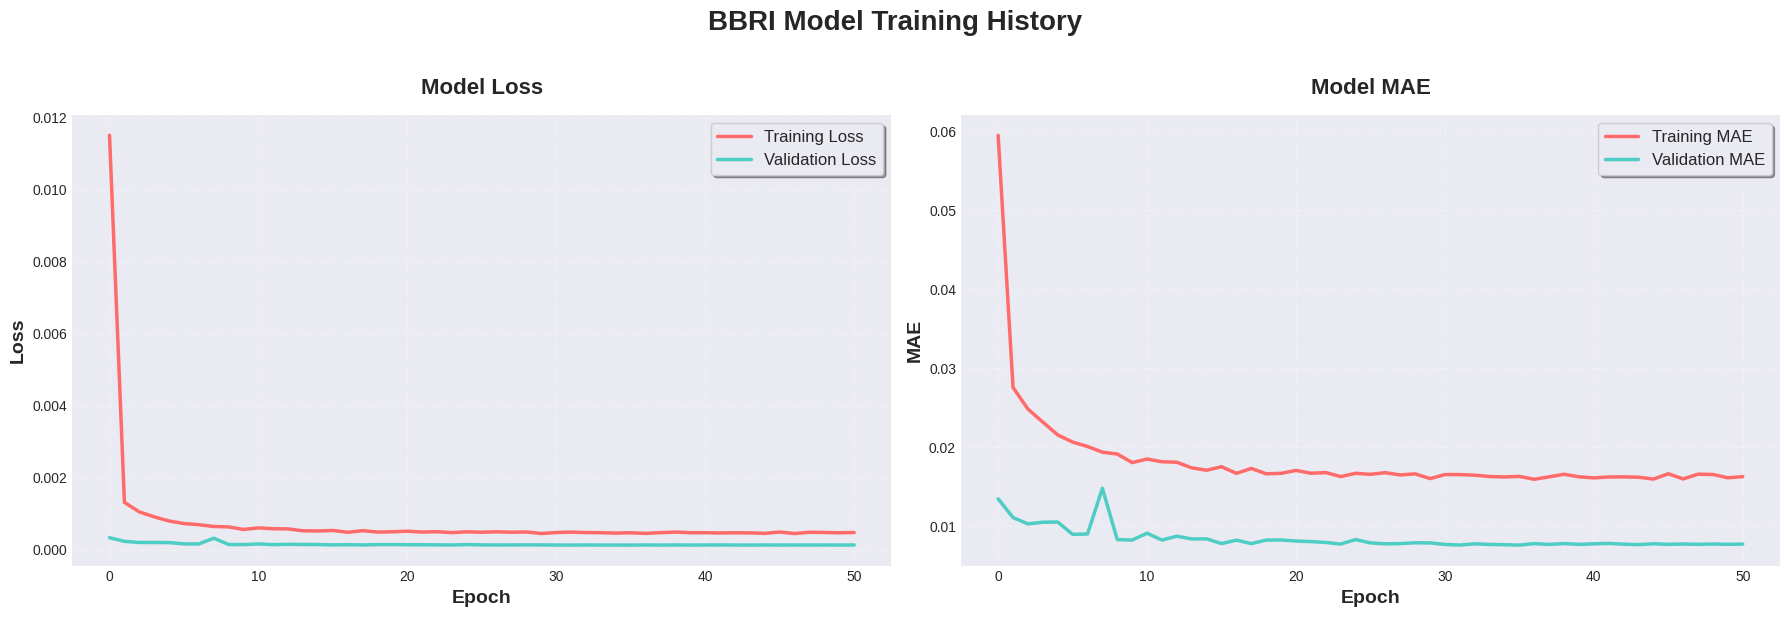

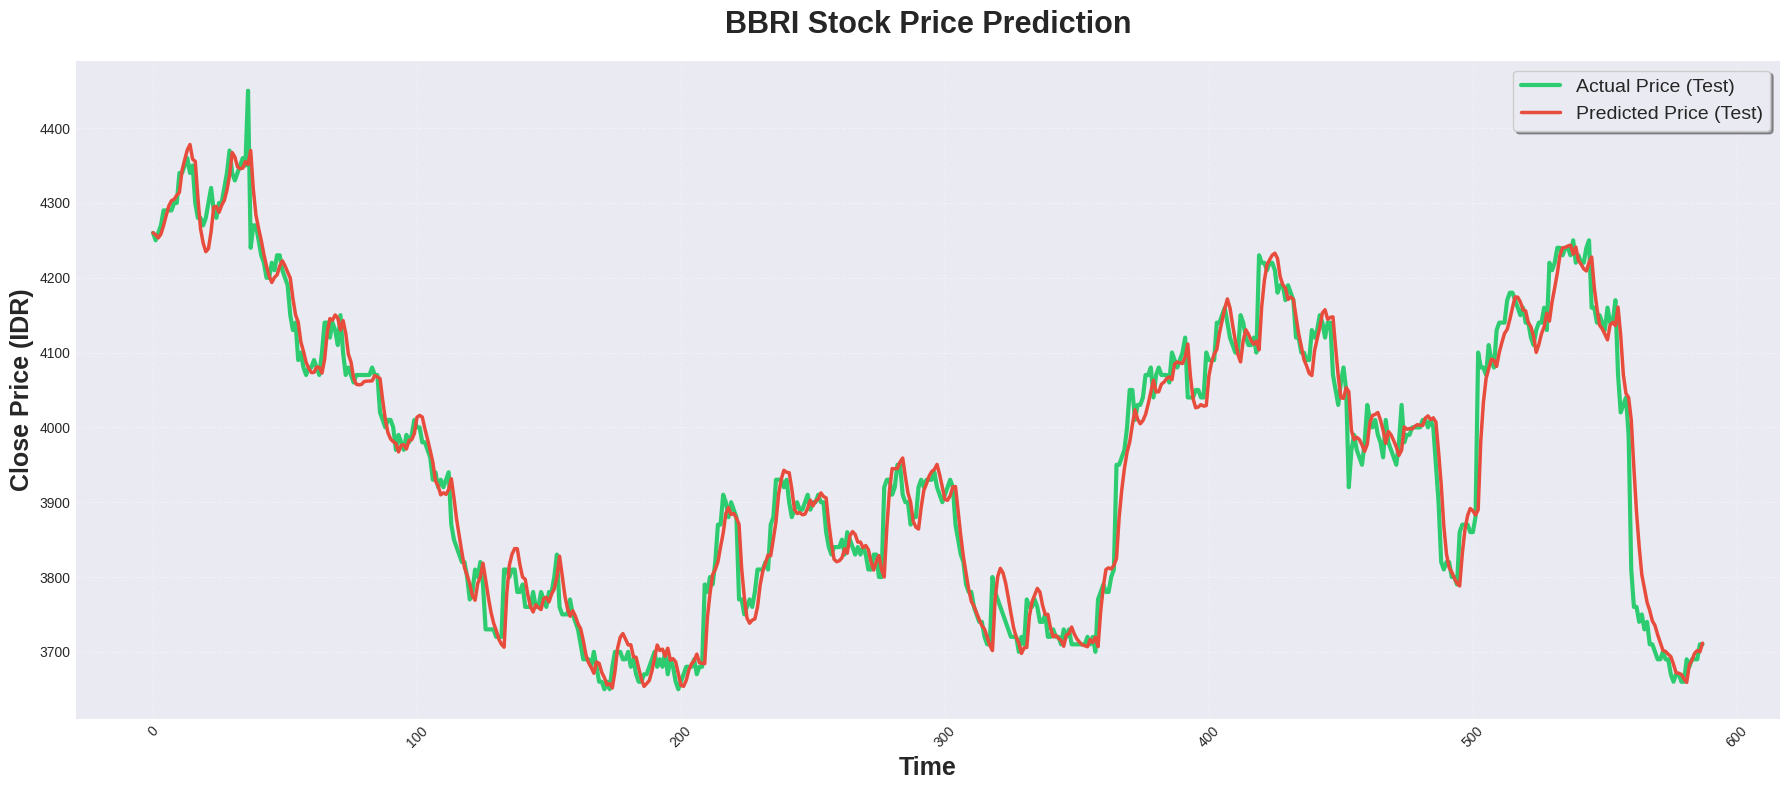

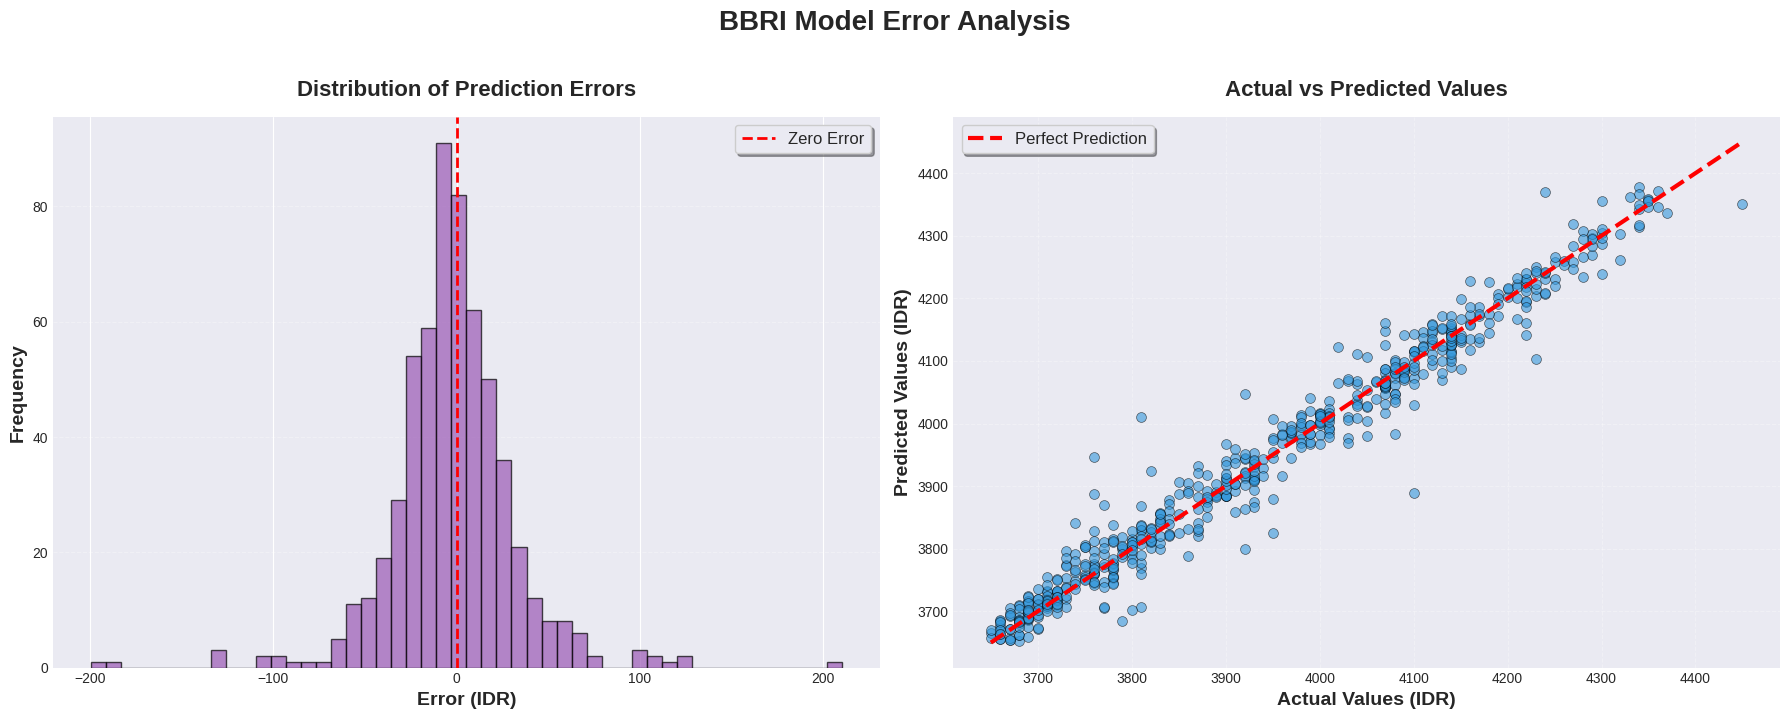

In [ ]:
# Visualization
print("\n" + "="*100)
print("GENERATING VISUALIZATIONS")
print("="*100)

# Plot 1: Training History - BBRI
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('BBRI Model Training History', fontsize=20, fontweight='bold', y=1.02)

axes[0].plot(history_BBRI.history['loss'], label='Training Loss', linewidth=2.5, color='#FF6B6B')
axes[0].plot(history_BBRI.history['val_loss'], label='Validation Loss', linewidth=2.5, color='#4ECDC4')
axes[0].set_title('Model Loss', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Epoch', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3, linestyle='--')

axes[1].plot(history_BBRI.history['mae'], label='Training MAE', linewidth=2.5, color='#FF6B6B')
axes[1].plot(history_BBRI.history['val_mae'], label='Validation MAE', linewidth=2.5, color='#4ECDC4')
axes[1].set_title('Model MAE', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Epoch', fontsize=14, fontweight='bold')
axes[1].set_ylabel('MAE', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()
print("="*100)

# Plot 2: Predictions vs Actual - BBRI
plt.figure(figsize=(18, 8))
plt.title('BBRI Stock Price Prediction', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Close Price (IDR)', fontsize=18, fontweight='bold')
plot_indices = df_BBRI.index[train_size_BBRI + window_size_B:]
plt.plot(y_test_actual, label='Actual Price (Test)', color='#2ECC71', linewidth=3)
plt.plot(predictions, label='Predicted Price (Test)', color='#E74C3C', linewidth=2.5)
plt.xticks(rotation=45)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True, fancybox=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
print("="*100)

# Plot 3: Error Analysis - BBRI
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('BBRI Model Error Analysis', fontsize=20, fontweight='bold', y=1.02)

errors = y_test_actual - predictions
axes[0].hist(errors, bins=50, edgecolor='black', color='#9B59B6', alpha=0.7)
axes[0].set_title('Distribution of Prediction Errors', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Error (IDR)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3, linestyle='--', axis='y')

axes[1].scatter(y_test_actual, predictions, alpha=0.6, s=50, color='#3498DB', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', lw=3, label='Perfect Prediction')
axes[1].set_title('Actual vs Predicted Values', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Actual Values (IDR)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Predicted Values (IDR)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


GENERATING VISUALIZATIONS


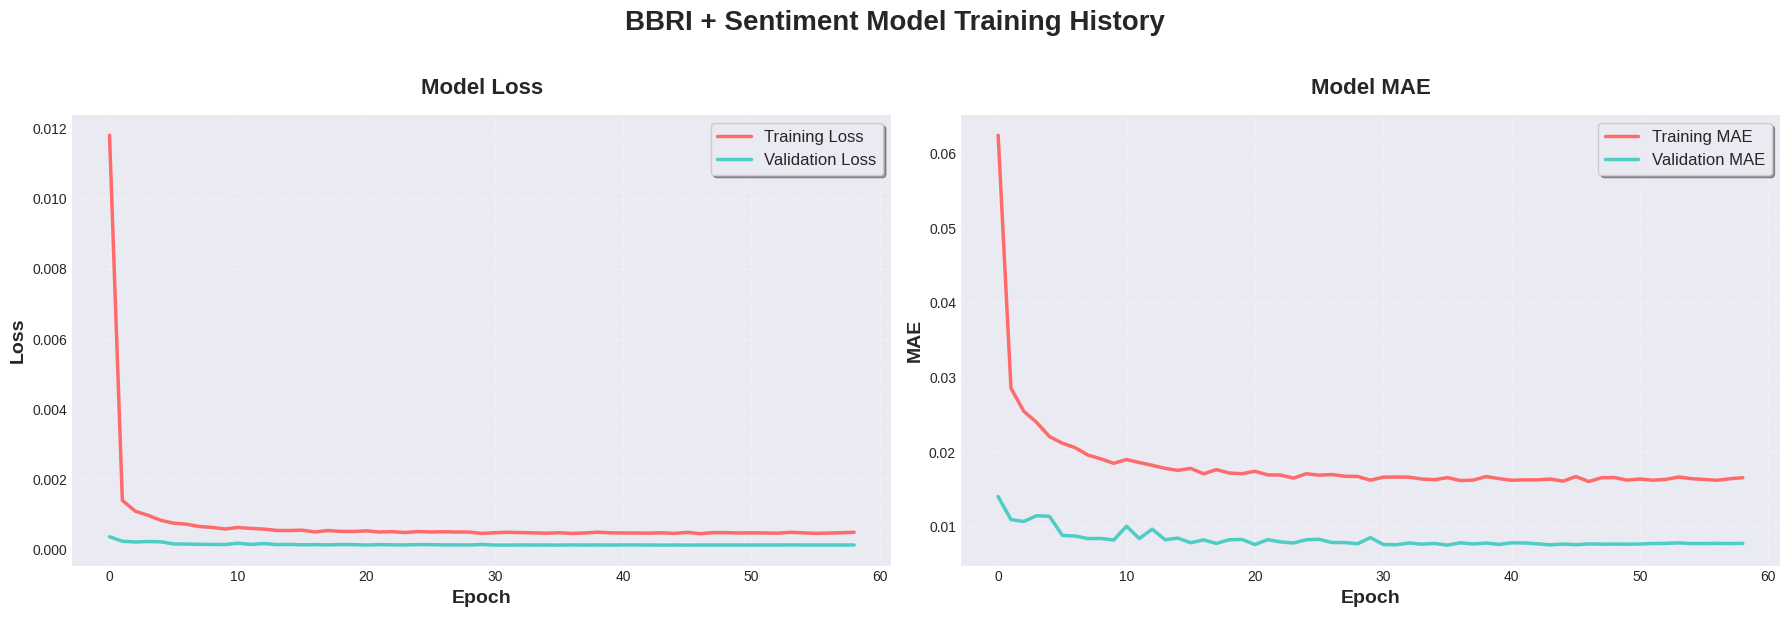

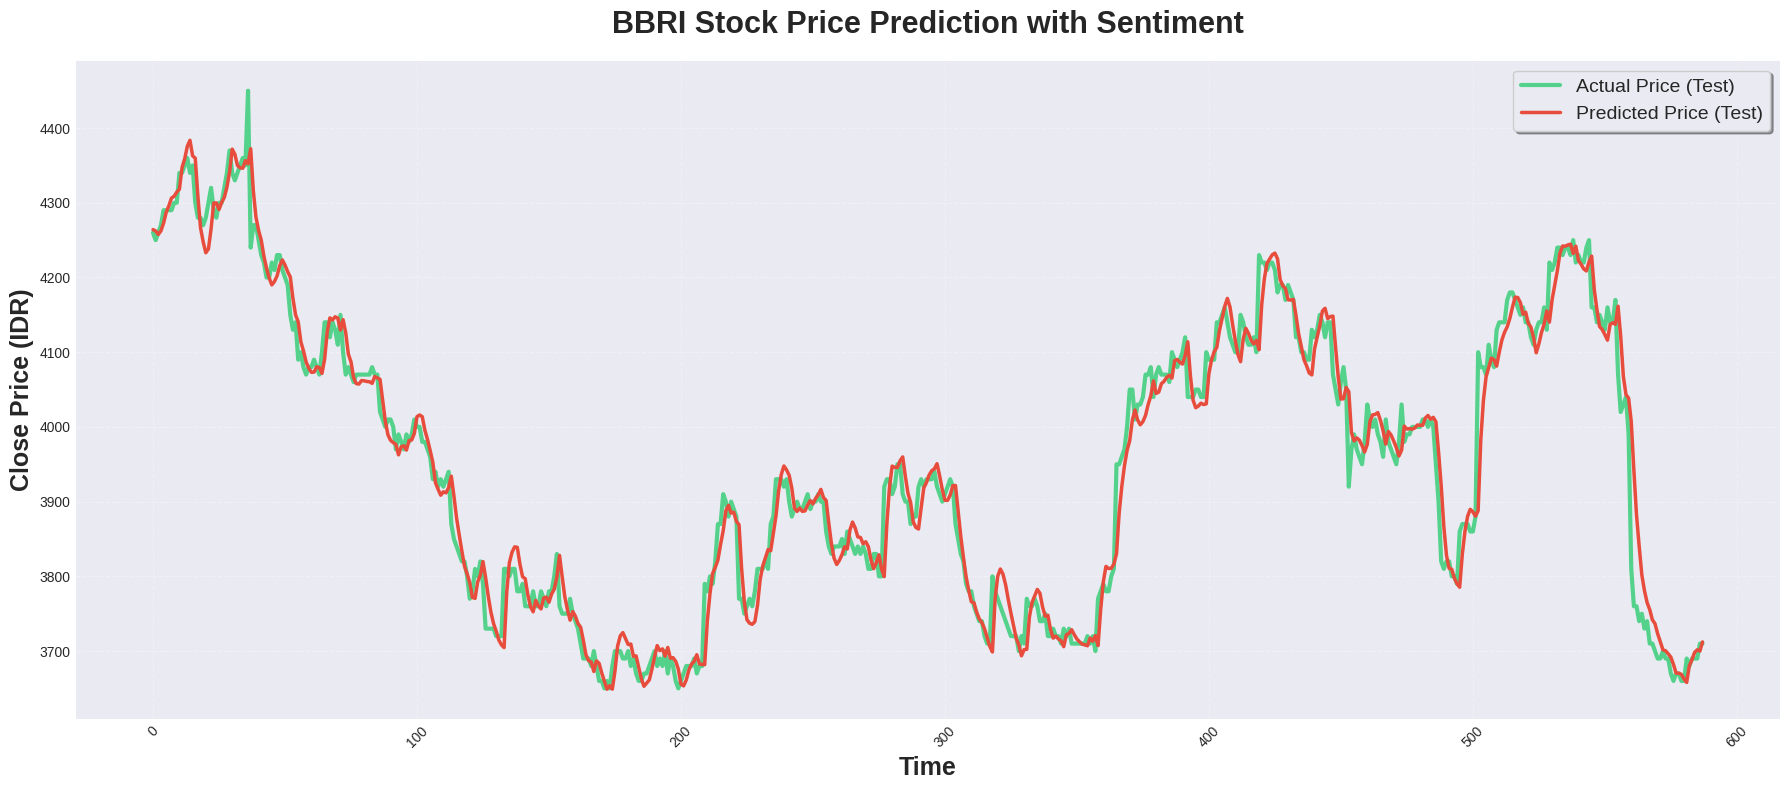

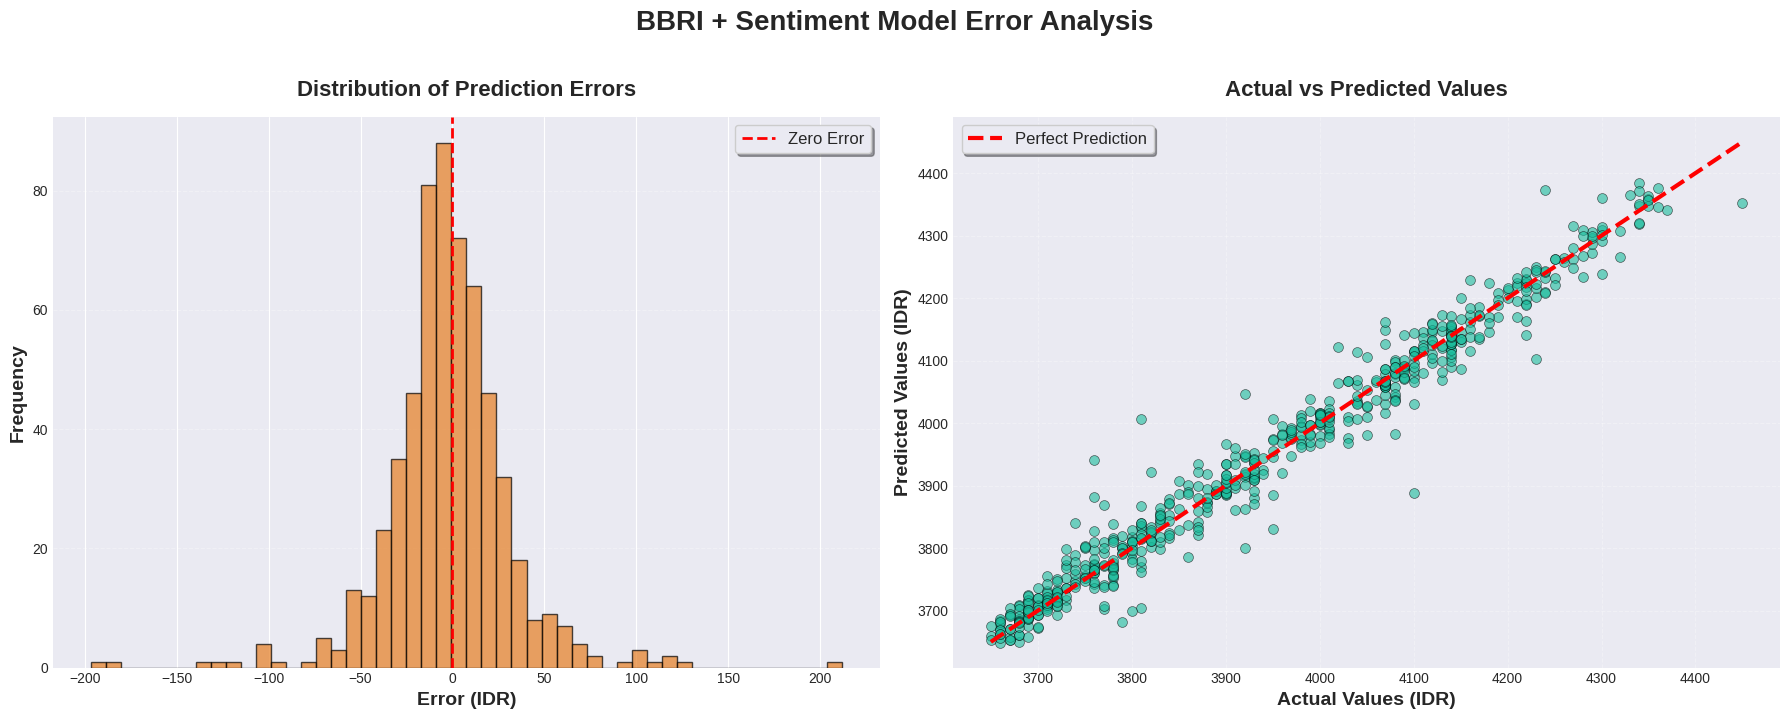

In [ ]:
# Visualization
print("\n" + "="*100)
print("GENERATING VISUALIZATIONS")
print("="*100)

# Plot 1: Training History - BBRI + Sentiment
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('BBRI + Sentiment Model Training History', fontsize=20, fontweight='bold', y=1.02)

axes[0].plot(history_BBRI_Full.history['loss'], label='Training Loss', linewidth=2.5, color='#FF6B6B')
axes[0].plot(history_BBRI_Full.history['val_loss'], label='Validation Loss', linewidth=2.5, color='#4ECDC4')
axes[0].set_title('Model Loss', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Epoch', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3, linestyle='--')

axes[1].plot(history_BBRI_Full.history['mae'], label='Training MAE', linewidth=2.5, color='#FF6B6B')
axes[1].plot(history_BBRI_Full.history['val_mae'], label='Validation MAE', linewidth=2.5, color='#4ECDC4')
axes[1].set_title('Model MAE', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Epoch', fontsize=14, fontweight='bold')
axes[1].set_ylabel('MAE', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()
print("="*100)

# Plot 2: Predictions vs Actual - BBRI + Sentiment
plt.figure(figsize=(18, 8))
plt.title('BBRI Stock Price Prediction with Sentiment', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Close Price (IDR)', fontsize=18, fontweight='bold')
plot_indices = df_BBRI_Full.index[train_size_BBRI_Full + window_size_Full:]
plt.plot(y_test_actual_Full, label='Actual Price (Test)', color='#2ECC71', linewidth=3, alpha=0.8)
plt.plot(predictions_Full, label='Predicted Price (Test)', color='#E74C3C', linewidth=2.5)
plt.legend(fontsize=14, loc='best', frameon=True, shadow=True, fancybox=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("="*100)

# Plot 3: Error Analysis - BBRI + Sentiment
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('BBRI + Sentiment Model Error Analysis', fontsize=20, fontweight='bold', y=1.02)

errors_Full = y_test_actual_Full - predictions_Full
axes[0].hist(errors_Full, bins=50, edgecolor='black', color='#E67E22', alpha=0.7)
axes[0].set_title('Distribution of Prediction Errors', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Error (IDR)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[0].grid(True, alpha=0.3, linestyle='--', axis='y')

axes[1].scatter(y_test_actual_Full, predictions_Full, alpha=0.6, s=50, color='#1ABC9C', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test_actual_Full.min(), y_test_actual_Full.max()],
         [y_test_actual_Full.min(), y_test_actual_Full.max()],
         'r--', lw=3, label='Perfect Prediction')
axes[1].set_title('Actual vs Predicted Values', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Actual Values (IDR)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Predicted Values (IDR)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12, loc='best', frameon=True, shadow=True)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


MULTI-STEP FORECASTING: 24 HOURS AHEAD
24-hour forecasts generated: 100 values
Forecast range: 3700.41 - 3720.10


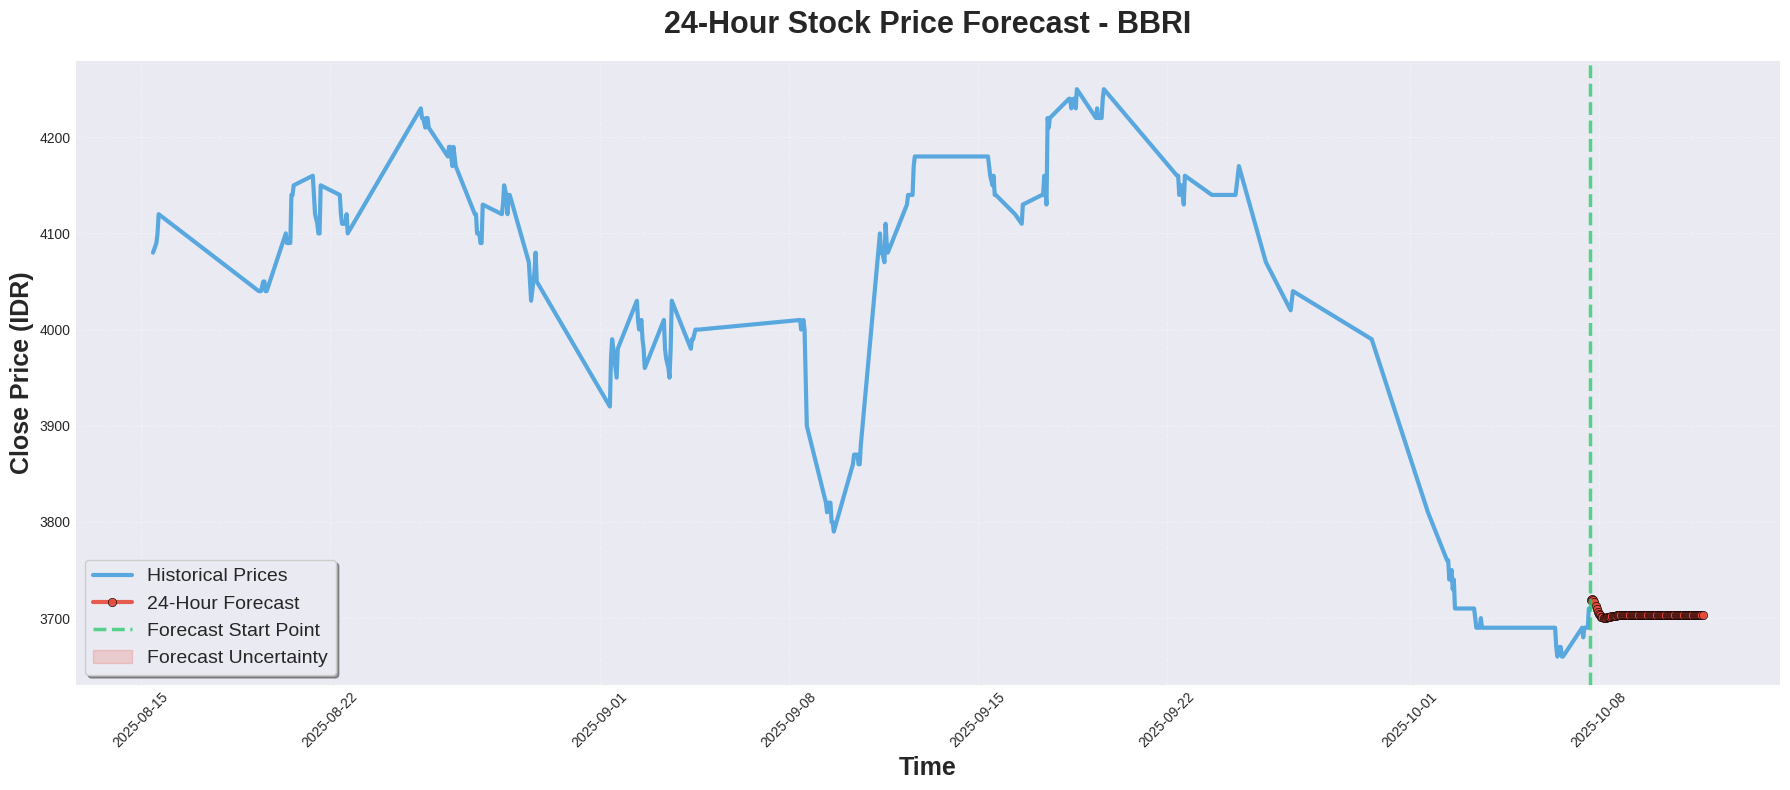

In [ ]:
print("\n" + "="*100)
print("MULTI-STEP FORECASTING: 24 HOURS AHEAD")
print("="*100)

def forecast_multistep(model, last_window, scaler, target_col_idx, n_steps, n_features):
    current_window = last_window.copy()
    forecasts = []

    for step in range(n_steps):
        X_pred = current_window.reshape(1, current_window.shape[0], current_window.shape[1])
        next_pred_scaled = model.predict(X_pred, verbose=0)[0, 0]

        dummy = np.zeros((1, n_features))
        dummy[0, target_col_idx] = next_pred_scaled
        next_pred_original = scaler.inverse_transform(dummy)[0, target_col_idx]

        forecasts.append(next_pred_original)

        new_row = current_window[-1, :].copy()
        new_row[target_col_idx] = next_pred_scaled
        current_window = np.vstack([current_window[1:], new_row])

    return np.array(forecasts)

last_window_scaled_BBRI = scaled_test_data_BBRI[-window_size_B:]
forecasts_BBRI = forecast_multistep(
    model_BBRI,
    last_window_scaled_BBRI,
    scaler_BBRI,
    target_col_BBRI,
    n_steps=100,
    n_features=X_train_BBRI.shape[2]
)

print(f"24-hour forecasts generated: {len(forecasts_BBRI)} values")
print(f"Forecast range: {forecasts_BBRI.min():.2f} - {forecasts_BBRI.max():.2f}")

last_datetime_BBRI = df_BBRI.index[-1]
forecast_datetimes_BBRI = [last_datetime_BBRI + timedelta(hours=i+1) for i in range(len(forecasts_BBRI))]

# 24-Hour Forecast Visualization
plt.figure(figsize=(18, 8))
plt.title('24-Hour Stock Price Forecast - BBRI', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Close Price (IDR)', fontsize=18, fontweight='bold')

historical_data = df_BBRI['Close'].iloc[-200:]
plt.plot(historical_data.index, historical_data.values,
         label='Historical Prices', color='#3498DB', linewidth=3, alpha=0.8)
plt.plot(forecast_datetimes_BBRI, forecasts_BBRI,
         label='24-Hour Forecast', color='#E74C3C', linewidth=3, marker='o',
         markersize=6, alpha=0.9, markeredgecolor='black', markeredgewidth=0.5)
plt.axvline(x=last_datetime_BBRI, color='#2ECC71', linestyle='--', linewidth=2.5,
            label='Forecast Start Point', alpha=0.8)

# Add confidence band (simple visualization)
forecast_std = np.std(forecasts_BBRI)
plt.fill_between(forecast_datetimes_BBRI,
                 forecasts_BBRI - forecast_std,
                 forecasts_BBRI + forecast_std,
                 alpha=0.2, color='#E74C3C', label='Forecast Uncertainty')

plt.legend(fontsize=14, loc='best', frameon=True, shadow=True, fancybox=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

24-hour forecasts generated: 100 values
Forecast range: 3699.32 - 3720.57


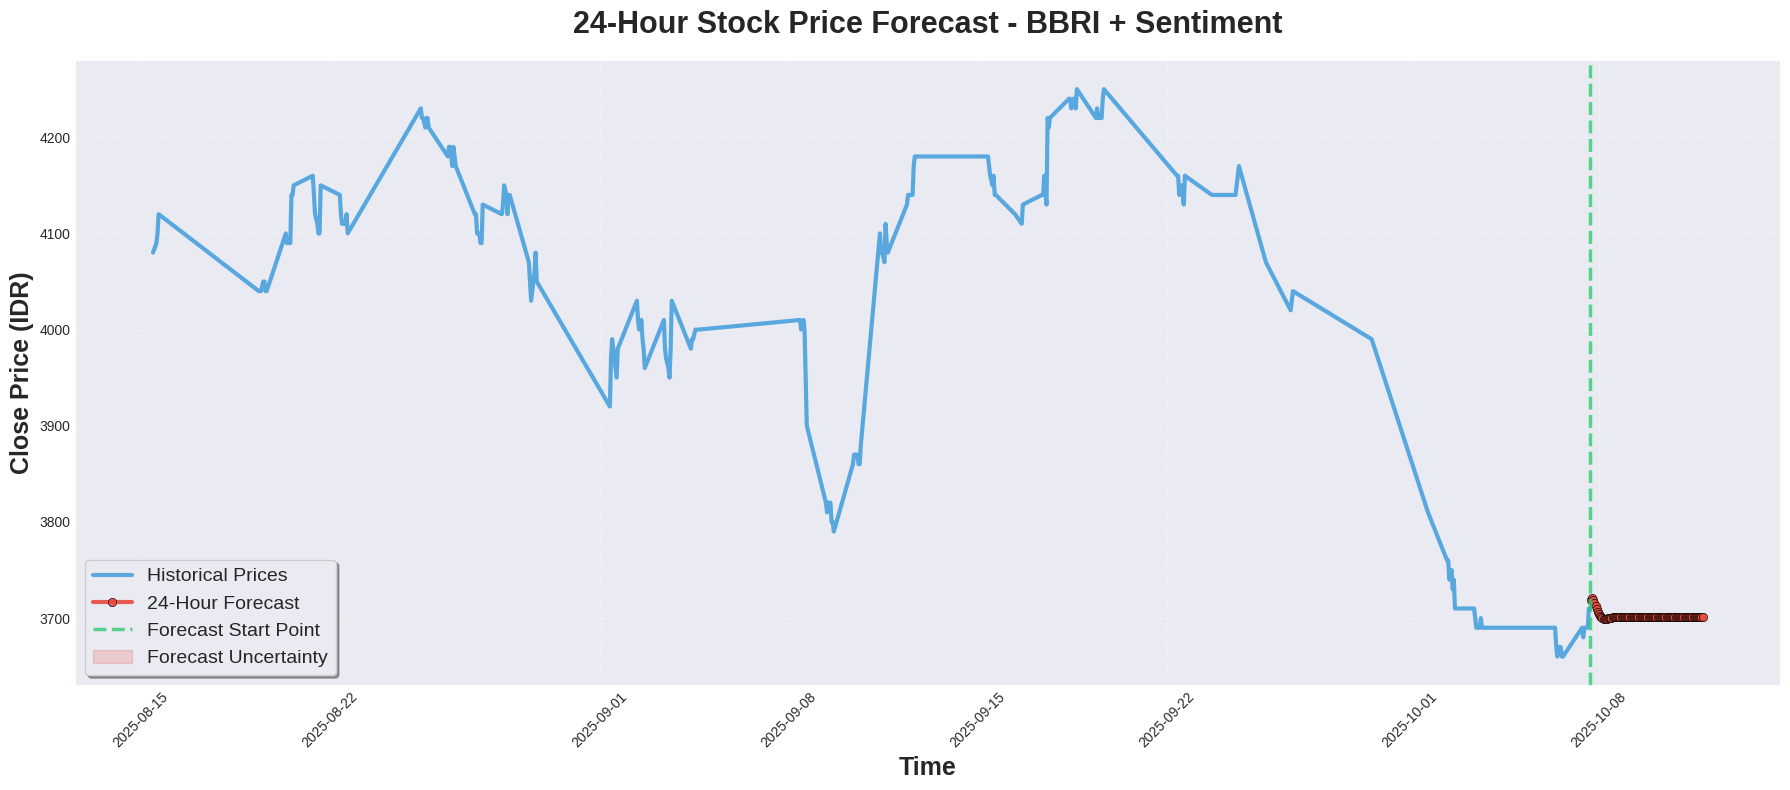

In [ ]:
last_window_scaled_BBRI_Full = scaled_test_data_BBRI_Full[-window_size_Full:]
forecasts_BBRI_Full = forecast_multistep(
    model_BBRI_Full,
    last_window_scaled_BBRI_Full,
    scaler_BBRI_Full,
    target_col_BBRI_Full,
    n_steps=100,
    n_features=X_train_BBRI_Full.shape[2]
)

print(f"24-hour forecasts generated: {len(forecasts_BBRI_Full)} values")
print(f"Forecast range: {forecasts_BBRI_Full.min():.2f} - {forecasts_BBRI_Full.max():.2f}")

last_datetime_BBRI_Full = df_BBRI_Full.index[-1]
forecast_datetimes_BBRI_Full = [last_datetime_BBRI_Full + timedelta(hours=i+1) for i in range(len(forecasts_BBRI_Full))]


plt.figure(figsize=(18, 8))
plt.title('24-Hour Stock Price Forecast - BBRI + Sentiment', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Time', fontsize=18, fontweight='bold')
plt.ylabel('Close Price (IDR)', fontsize=18, fontweight='bold')

historical_data_Full = df_BBRI_Full['Close'].iloc[-200:]
plt.plot(historical_data_Full.index, historical_data_Full.values,
         label='Historical Prices', color='#3498DB', linewidth=3, alpha=0.8)
plt.plot(forecast_datetimes_BBRI_Full, forecasts_BBRI_Full,
         label='24-Hour Forecast', color='#E74C3C', linewidth=3, marker='o',
         markersize=6, alpha=0.9, markeredgecolor='black', markeredgewidth=0.5)
plt.axvline(x=last_datetime_BBRI_Full, color='#2ECC71', linestyle='--', linewidth=2.5,
            label='Forecast Start Point', alpha=0.8)


forecast_std_Full = np.std(forecasts_BBRI_Full)
plt.fill_between(forecast_datetimes_BBRI_Full,
                 forecasts_BBRI_Full - forecast_std_Full,
                 forecasts_BBRI_Full + forecast_std_Full,
                 alpha=0.2, color='#E74C3C', label='Forecast Uncertainty')

plt.legend(fontsize=14, loc='best', frameon=True, shadow=True, fancybox=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*100)
print("SAVING RESULTS")
print("="*100)

actual_vs_predicted_BBRI = pd.DataFrame({
    'Open': df_BBRI['Open'][train_size_BBRI + window_size_B:],
    'High': df_BBRI['High'][train_size_BBRI + window_size_B:],
    'Low': df_BBRI['Low'][train_size_BBRI + window_size_B:],
    'Close': y_test_actual,
    'Volume': df_BBRI['Volume'][train_size_BBRI + window_size_B:],
    'EMA_12': df_BBRI['EMA_12'][train_size_BBRI + window_size_B:],
    'EMA_26': df_BBRI['EMA_26'][train_size_BBRI + window_size_B:],
    'RSI_14': df_BBRI['RSI_14'][train_size_BBRI + window_size_B:],
    'Close_Predicted': predictions
})

print("\nBBRI Results Preview:")
print(actual_vs_predicted_BBRI.head())
actual_vs_predicted_BBRI.to_csv('actual_vs_predicted_BBRI.csv')
print("✓ BBRI results saved successfully")

actual_vs_predicted_BBRI_Full = pd.DataFrame({
    'Open': df_BBRI_Full['Open'][train_size_BBRI_Full + window_size_Full:],
    'High': df_BBRI_Full['High'][train_size_BBRI_Full + window_size_Full:],
    'Low': df_BBRI_Full['Low'][train_size_BBRI_Full + window_size_Full:],
    'Close': y_test_actual_Full,
    'Volume': df_BBRI_Full['Volume'][train_size_BBRI_Full + window_size_Full:],
    'EMA_12': df_BBRI_Full['EMA_12'][train_size_BBRI_Full + window_size_Full:],
    'EMA_26': df_BBRI_Full['EMA_26'][train_size_BBRI_Full + window_size_Full:],
    'RSI_14': df_BBRI_Full['RSI_14'][train_size_BBRI_Full + window_size_Full:],
    'average_score': df_BBRI_Full['average_score'][train_size_BBRI_Full + window_size_Full:],
    'Sentiment_value': df_BBRI_Full['Sentiment_value'][train_size_BBRI_Full + window_size_Full:],
    'ABS_Average_Score': df_BBRI_Full['ABS_Average_Score'][train_size_BBRI_Full + window_size_Full:],
    'Close_Predicted': predictions_Full
})

print("\nBBRI + Sentiment Results Preview:")
print(actual_vs_predicted_BBRI_Full.head())
actual_vs_predicted_BBRI_Full.to_csv('actual_vs_predicted_BBRI_Sentiment.csv')
print("✓ BBRI + Sentiment results saved successfully")


SAVING RESULTS

BBRI Results Preview:
                             Open    High     Low   Close    Volume  \
Datetime                                                              
2025-05-21 14:00:00+07:00  4260.0  4310.0  4250.0  4260.0  88598700   
2025-05-21 15:00:00+07:00  4260.0  4270.0  4250.0  4250.0  43763500   
2025-05-21 16:00:00+07:00  4260.0  4260.0  4260.0  4260.0  24270100   
2025-05-22 09:00:00+07:00  4280.0  4300.0  4240.0  4270.0         0   
2025-05-22 10:00:00+07:00  4270.0  4310.0  4270.0  4290.0  50700300   

                                EMA_12       EMA_26     RSI_14  \
Datetime                                                         
2025-05-21 14:00:00+07:00  4247.396766  4217.493944  61.178859   
2025-05-21 15:00:00+07:00  4247.797264  4219.901800  58.308294   
2025-05-21 16:00:00+07:00  4249.674608  4222.872037  60.313652   
2025-05-22 09:00:00+07:00  4252.801591  4226.362997  62.268149   
2025-05-22 10:00:00+07:00  4258.524423  4231.076849  65.886681   



In [ ]:
# Final Summary
print("\n" + "="*100)
print("FINAL SUMMARY")
print("="*100)

summary_data = {
    'Model': ['Without Sentiment', 'With Sentiment'],
    'RMSE': [rmse_BBRI, rmse_BBRI_Full],
    'MAE': [mae_BBRI, mae_BBRI_Full],
    'MAPE': [mape_BBRI, mape_BBRI_Full],
    'R² Score': [r2_BBRI, r2_BBRI_Full]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

improvement_RMSE = ((rmse_BBRI - rmse_BBRI_Full) / rmse_BBRI) * 100
improvement_MAE = ((mae_BBRI - mae_BBRI_Full) / mae_BBRI) * 100
improvement_MAPE = ((mape_BBRI - mape_BBRI_Full) / mape_BBRI) * 100
improvement_R2 = ((r2_BBRI_Full - r2_BBRI) / r2_BBRI) * 100
print(f"\n{'='*100}")
print(f"RMSE Improvement with Sentiment Analysis: {improvement_RMSE:.2f}%")
print(f"MAE Improvement with Sentiment Analysis: {improvement_MAE:.2f}%")
print(f"MAPE Improvement with Sentiment Analysis: {improvement_MAPE:.2f}%")
print(f"R² Score Improvement with Sentiment Analysis: {improvement_R2:.2f}%")
print(f"{'='*100}")


FINAL SUMMARY

            Model      RMSE       MAE     MAPE  R² Score
Without Sentiment 34.290389 23.138976 0.005860  0.968880
   With Sentiment 34.128854 23.072953 0.005842  0.969172

RMSE Improvement with Sentiment Analysis: 0.47%
MAE Improvement with Sentiment Analysis: 0.29%
MAPE Improvement with Sentiment Analysis: 0.30%
R² Score Improvement with Sentiment Analysis: 0.03%
